In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

# Plotting params

In [2]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  # Times for publication
    "font.size": 10,                    # Base font size
    "axes.labelsize": 10,              # Axis label font size
    "axes.labelweight": "bold",         # Bold axis labels
    "font.weight": "bold",          # Bold font for all text
    "axes.titlesize": 10,              # Axis title (not fig title)
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,              # Tick label font size
    "legend.fontsize": 10,              # Legend font size

    "figure.dpi": 300,                 # Display resolution
    "savefig.dpi": 300,                # Save resolution
    "figure.figsize": (3.25, 2.6),     # For 0.5\textwidth plot
    "figure.constrained_layout.use": True,  # Better spacing than tight_layout

    "axes.linewidth": 0.8,             # Thin but clear axes lines
    "lines.linewidth": 1.2,
    "lines.markersize": 5,

    "axes.spines.top": False,
    "axes.spines.right": False,

    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,

    "legend.frameon": False,
    "legend.handlelength": 2.0,        # Slightly longer legend lines
    "legend.handletextpad": 0.5,

    "pdf.fonttype": 42,                # Embed editable fonts in PDF
    "ps.fonttype": 42
})


folder_name_png = 'PLOTS_IGT_SCORES_PNG'
folder_name_svg = 'PLOTS_IGT_SCORES_SVG'
save_fig = True
alpha = 1

# NORMAL CONDITION

In [3]:
# read pickle file
with open(r'DATA\igt_normal_simulation.pkl', 'rb') as f:
    normal_results_IGT = pickle.load(f)

In [4]:
IGT_simulated = normal_results_IGT['IGT_sim']
IGT_experimental = normal_results_IGT['IGT_exp']
IGT_std_simulated = normal_results_IGT['IGT_sim_std']
IGT_std_experimental = normal_results_IGT['IGT_exp_std']

n_expt = normal_results_IGT['n_expt']
n_sim = normal_results_IGT['n_sim']

A_experimental = normal_results_IGT['A_experimental']
B_experimental = normal_results_IGT['B_experimental']
C_experimental = normal_results_IGT['C_experimental']
D_experimental = normal_results_IGT['D_experimental']

A_simulated = normal_results_IGT['A_simulated']
B_simulated = normal_results_IGT['B_simulated']
C_simulated = normal_results_IGT['C_simulated']
D_simulated = normal_results_IGT['D_simulated']

statistical_test = normal_results_IGT['statistical test']

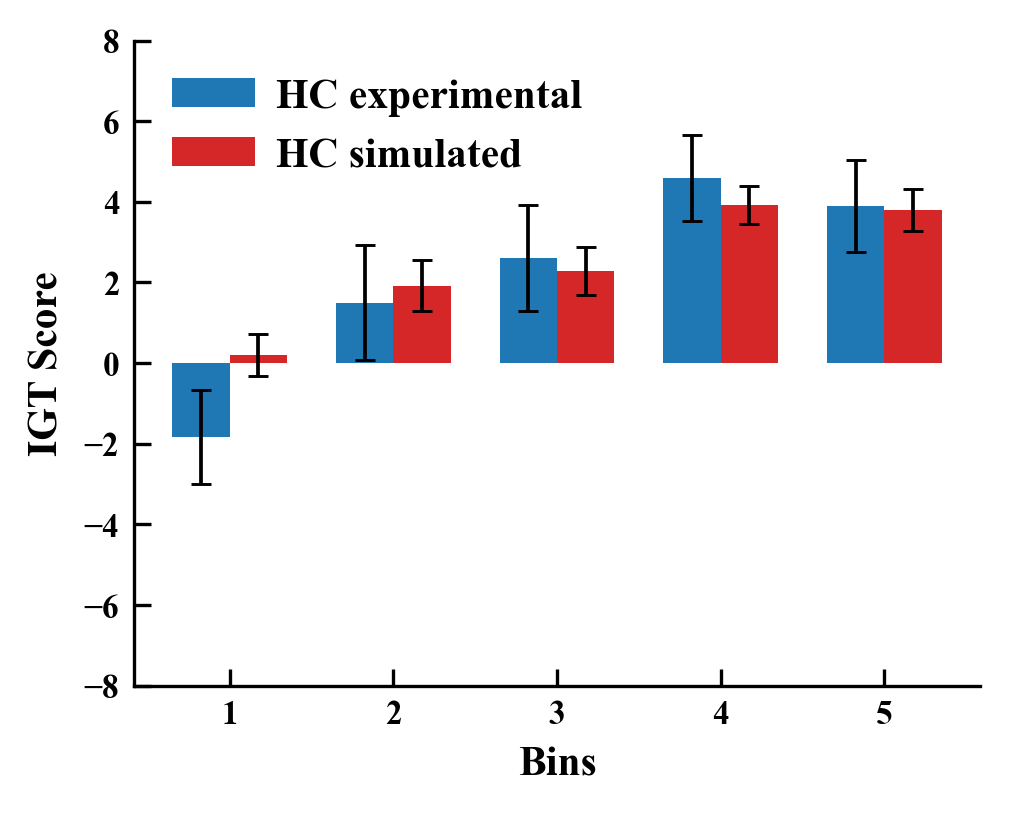

In [5]:
BINS = np.arange(5) + 1
bar_width = 0.35
# Colorblind-friendly colors
colors = {
    'simulated': '#d62728',     
    'experimental': '#1f77b4'   
}
error_colors = {
    'simulated': '#000000',    
    'experimental': '#000000'   
}

# Plot
fig, ax = plt.subplots()

# Bars
ax.bar(BINS, IGT_experimental, width=bar_width, color=colors['experimental'], label='HC experimental', alpha = alpha)
ax.bar(BINS + bar_width, IGT_simulated, width=bar_width, color=colors['simulated'], label='HC simulated', alpha = alpha)

ax.errorbar(
    BINS,
    IGT_experimental,
    yerr=IGT_std_experimental / np.sqrt(n_expt),
    fmt='none',
    ecolor=error_colors['experimental'],
    elinewidth=0.9,
    capsize=2.5,
    capthick=0.7
)
ax.errorbar(
    BINS + bar_width,
    IGT_simulated,
    yerr=IGT_std_simulated / np.sqrt(n_sim),
    fmt='none',
    ecolor=error_colors['simulated'],
    elinewidth=0.9,
    capsize=2.5,
    capthick=0.7
)
# Axis formatting
ax.set_ylim(-8, 8)
ax.set_xlabel('Bins')
ax.set_ylabel('IGT Score')
ax.set_xticks(BINS + bar_width / 2)
ax.set_xticklabels([f'{b}' for b in BINS])
ax.legend(frameon=False, loc='upper left')
plt.show()

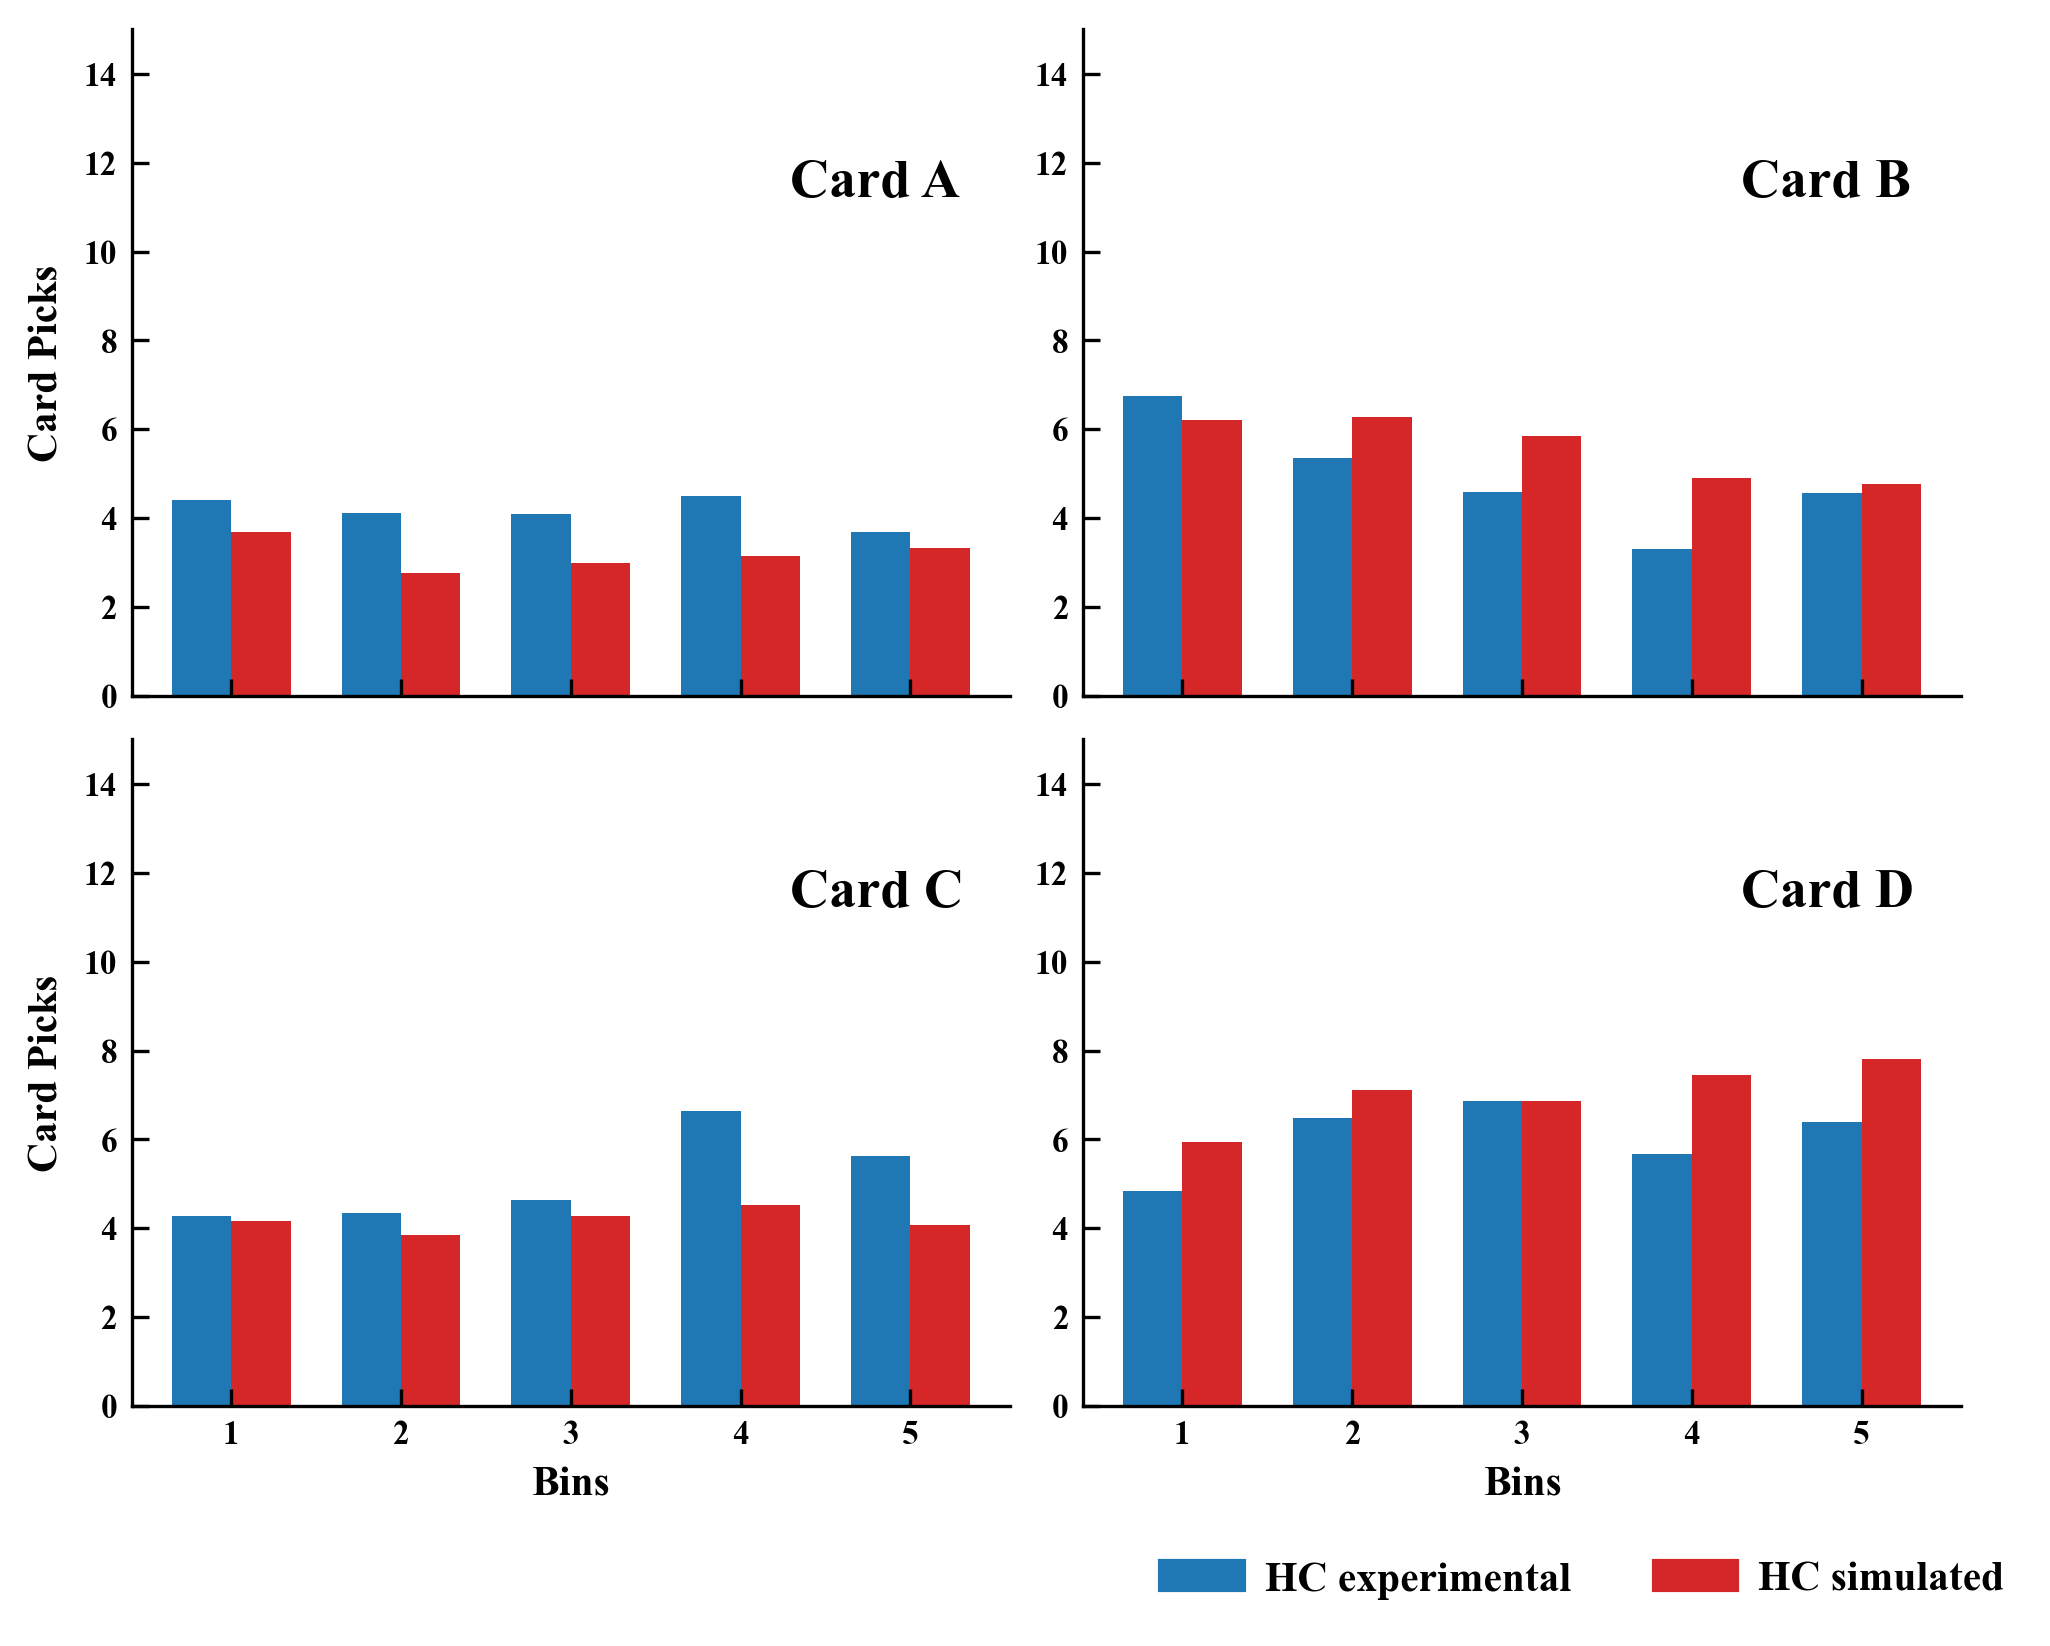

In [6]:
# Colors
colors = {
    'experimental': '#1f77b4',  # blue
    'simulated': '#d62728'      # orange
}

# Create figure
fig, axs = plt.subplots(2, 2, figsize=(3.26 * 2, 2.5 * 2), sharex = True)

# Plot function for reuse
def plot_card(ax, exp_data, sim_data, card_label):
    
    ax.bar(BINS, exp_data, width=bar_width, color=colors['experimental'], alpha=alpha)
    ax.bar(BINS + bar_width, sim_data, width=bar_width, color=colors['simulated'], alpha=alpha)
    ax.set_ylim(0, 15)
    ax.set_xticks(BINS + bar_width / 2)
    ax.set_xticklabels([str(b) for b in BINS])
    ax.text(0.75, 0.75, card_label, transform=ax.transAxes, fontsize=13, weight='bold')

# Subplots
plot_card(axs[0, 0], A_experimental, A_simulated, 'Card A')
axs[0, 0].set_ylabel('Card Picks')

plot_card(axs[0, 1], B_experimental, B_simulated, 'Card B')

plot_card(axs[1, 0], C_experimental, C_simulated, 'Card C')
axs[1, 0].set_xlabel('Bins')
axs[1, 0].set_ylabel('Card Picks')

plot_card(axs[1, 1], D_experimental, D_simulated, 'Card D')
axs[1, 1].set_xlabel('Bins')

# Create one shared legend below all plots
handles = [
    plt.Rectangle((0,0),1,1, color=colors['experimental'], label='HC experimental'),
    plt.Rectangle((0,0),1,1, color=colors['simulated'], label='HC simulated')
]
fig.legend(handles=handles, loc='lower center', ncol=2, frameon=False, bbox_to_anchor=(0.8, -0.08))
plt.show()

# PD and Normal CONDITION

In [7]:
# Reading PD pickle file
# read pickle file
with open(r'DATA\igt_normal_simulation.pkl', 'rb') as f:
    normal_results_IGT = pickle.load(f)

with open(r'DATA\igt_pd_simulation.pkl', 'rb') as f:
    pd_results_IGT = pickle.load(f)

# Extracting PD results
IGT_simulated_pd = pd_results_IGT['IGT_sim']
IGT_std_simulated_pd = pd_results_IGT['IGT_sim_std']
n_sim_pd = pd_results_IGT['n_sim'] 

IGT_experimental_pd = pd_results_IGT['IGT_exp']
IGT_std_experimental_pd = pd_results_IGT['IGT_exp_std']
n_expt_pd = pd_results_IGT['n_expt']

# Extracting normal results
IGT_simulated_normal = normal_results_IGT['IGT_sim']
IGT_std_simulated_normal = normal_results_IGT['IGT_sim_std']
n_sim_normal = normal_results_IGT['n_sim']

IGT_experimental_normal = normal_results_IGT['IGT_exp']
IGT_std_experimental_normal = normal_results_IGT['IGT_exp_std']
n_expt_normal = normal_results_IGT['n_expt']


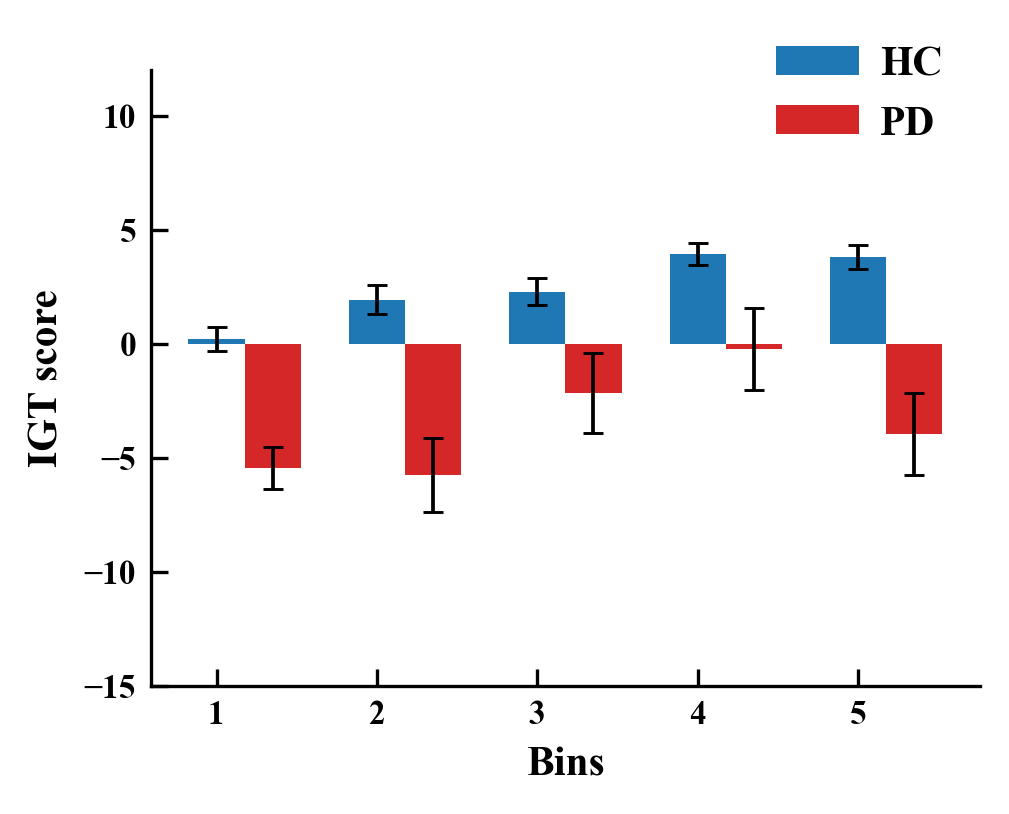

In [8]:
BINS = np.arange(5) + 1
bar_width = 0.35
colors = {
    'PD': '#d62728',     # dark orange
    'normal': '#1f77b4'   # dark blue
}
error_colors = {
    'PD': '#000000',     # dark blue
    'normal': '#000000'   # dark orange/brown
}
# plotting bar plot for PD vs Normal
fig, ax = plt.subplots()
# Bars for PD and Normal
ax.bar(BINS, IGT_simulated_normal, width=bar_width, color=colors['normal'], label='HC', alpha=alpha)
ax.bar(BINS + bar_width, IGT_simulated_pd, width=bar_width, color=colors['PD'], label='PD', alpha=alpha)
# Error bars for PD and Normal
ax.errorbar(
    BINS,
    IGT_simulated_normal,
    yerr=IGT_std_simulated_normal / np.sqrt(n_sim_normal),
    fmt='none',
    ecolor=error_colors['normal'],
    elinewidth=0.9,
    capsize=2.5,
    capthick=0.7
)
ax.errorbar(
    BINS + bar_width,
    IGT_simulated_pd,
    yerr=IGT_std_simulated_pd / np.sqrt(n_sim_pd),
    fmt='none',
    ecolor=error_colors['PD'],
    elinewidth=0.9,
    capsize=2.5,
    capthick=0.7
)
plt.ylim(-15, 12)
plt.xlabel('Bins')
plt.ylabel('IGT score')
plt.legend(frameon=False, loc='upper right', bbox_to_anchor=(1,1.1))
plt.show()

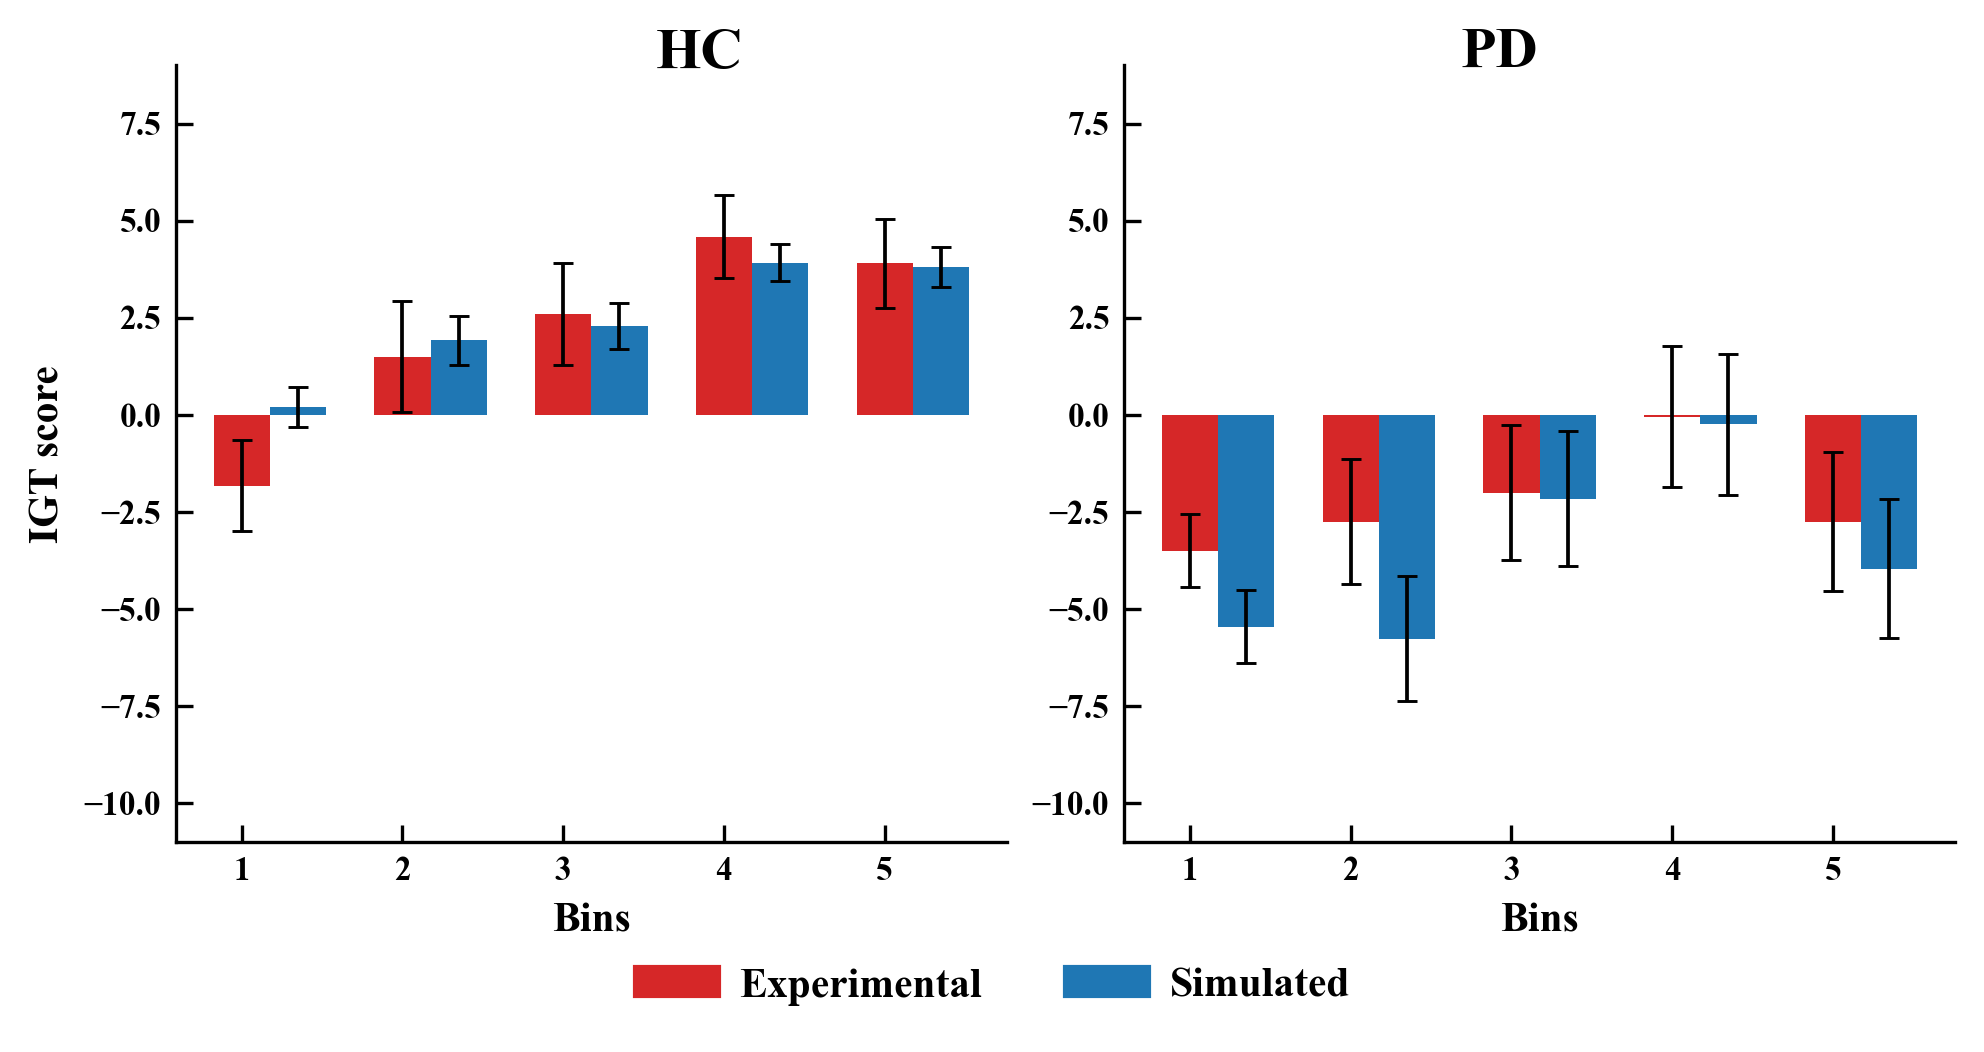

In [11]:
colors = {
    'Experimental': '#d62728',     # dark orange
    'Simulated': '#1f77b4'   # dark blue
}
error_colors = {
    'Experimental': '#000000',     # dark blue
    'Simulated': '#000000'   # dark orange/brown
}

# 2 subplots left for Normal and right for PD
fig, axs = plt.subplots(1, 2, figsize=(6.5, 3), sharey=False)
# Left subplot for Normal
axs[0].bar(BINS, IGT_experimental_normal, width=bar_width, color=colors['Experimental'], label='Experimental', alpha=alpha)
axs[0].bar(BINS + bar_width, IGT_simulated_normal, width=bar_width, color=colors['Simulated'], label='Simulated', alpha=alpha)
axs[0].errorbar(
    BINS,
    IGT_experimental_normal,
    yerr=IGT_std_experimental_normal / np.sqrt(n_expt_normal),
    fmt='none',
    ecolor=error_colors['Experimental'],
    elinewidth=0.9,
    capsize=2.5,
    capthick=0.7
)
axs[0].errorbar(
    BINS + bar_width,
    IGT_simulated_normal,
    yerr=IGT_std_simulated_normal / np.sqrt(n_sim_normal),
    fmt='none',
    ecolor=error_colors['Simulated'],
    elinewidth=0.9,
    capsize=2.5,
    capthick=0.7
)
axs[0].set_ylim(-11, 9)
axs[0].set_xlabel('Bins')
axs[0].set_ylabel('IGT score')
# Right subplot for PD
axs[1].bar(BINS, IGT_experimental_pd, width=bar_width, color=colors['Experimental'], label='Experimental', alpha=alpha)
axs[1].bar(BINS + bar_width, IGT_simulated_pd, width=bar_width, color=colors['Simulated'], label='Simulated', alpha=alpha)
axs[1].errorbar(
    BINS,
    IGT_experimental_pd,
    yerr=IGT_std_experimental_pd / np.sqrt(n_expt_pd),
    fmt='none',
    ecolor=error_colors['Experimental'],
    elinewidth=0.9,
    capsize=2.5,
    capthick=0.7
)
axs[1].errorbar(
    BINS + bar_width,
    IGT_simulated_pd,
    yerr=IGT_std_simulated_pd / np.sqrt(n_sim_pd),
    fmt='none',
    ecolor=error_colors['Simulated'],
    elinewidth=0.9,
    capsize=2.5,
    capthick=0.7
)
axs[1].set_ylim(-11, 9)
axs[1].set_xlabel('Bins')
# Add a shared legend
handles = [
    plt.Rectangle((0,0),1,1, color=colors['Experimental'], label='Experimental'),
    plt.Rectangle((0,0),1,1, color=colors['Simulated'], label='Simulated')
]

# Add "HC" label above the left subplot
fig.text(0.35, 0.97, "HC", ha='center', va='bottom', fontsize=14, weight='bold')
# Add "PD" label above the right subplot
fig.text(0.76, 0.97, "PD", ha='center', va='bottom', fontsize=14, weight='bold')

fig.legend(handles=handles, loc='lower center', ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.1))
plt.show()


# DBS CONDITION COMPARISON

In [17]:
# Read the data from the pickle file
with open("DATA/igt_5th_bin_scores_PD.pkl", "rb") as f:
    data_loaded_PD = pickle.load(f)

with open("DATA/igt_5th_bin_scores_DBS_open_loop_low_amp.pkl", "rb") as f:
    data_loaded_DBS_open_loop_lowamp = pickle.load(f)

with open("Data/igt_5th_bin_scores_DBS_open_loop_high_amp.pkl", "rb") as f:
    data_loaded_DBS_open_loop_highamp = pickle.load(f)

with open("Data/igt_5th_bin_scores_DBS_closed_loop.pkl", "rb") as f:
    data_loaded_DBS_close_loop = pickle.load(f)


with open("DATA/igt_5th_bin_scores_std_DBS.pkl", "rb") as f:
    data_loaded_std_DBS = pickle.load(f)

In [18]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  # Times for publication
    "font.size": 10,                    # Base font size
    "axes.labelsize": 18,              # Axis label font size
    "axes.labelweight": "bold",         # Bold axis labels
    "font.weight": "bold",          # Bold font for all text
    "axes.titlesize": 13,              # Axis title (not fig title)
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "legend.fontsize": 15,              # Legend font size

    "figure.dpi": 300,                 # Display resolution
    "savefig.dpi": 300,                # Save resolution
    "figure.figsize": (3.25, 2.6),     # For 0.5\textwidth plot
    "figure.constrained_layout.use": True,  # Better spacing than tight_layout

    "axes.linewidth": 0.8,             # Thin but clear axes lines
    "lines.linewidth": 1.2,
    "lines.markersize": 5,

    "axes.spines.top": False,
    "axes.spines.right": False,

    "xtick.direction": "in",
    "ytick.direction": "in", 
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,

    "legend.frameon": False,
    "legend.handlelength": 1.0,        # Slightly longer legend lines
    "legend.handletextpad": 0.5,

    "pdf.fonttype": 42,                # Embed editable fonts in PDF
    "ps.fonttype": 42
})


folder_name_png = 'PLOTS_IGT_SCORES_PNG'
folder_name_svg = 'PLOTS_IGT_SCORES_SVG'
save_fig = True
alpha = 1

In [19]:
# Extract data from the loaded pickle files
del_lim_values_PD = data_loaded_PD["del_lim"]
igt_scores_PD = data_loaded_PD["igt_scores"]
igt_errors_PD = data_loaded_PD["igt_errors"]

del_lim_values_DBS_std = data_loaded_std_DBS["del_lim"]
igt_scores_DBS_std = data_loaded_std_DBS["igt_scores"]
igt_errors_DBS_std = data_loaded_std_DBS["igt_errors"]

del_lim_values_DBS_open_low = data_loaded_DBS_open_loop_lowamp["del_lim"]
igt_scores_DBS_open_low = data_loaded_DBS_open_loop_lowamp["igt_scores"]
igt_errors_DBS_open_low = data_loaded_DBS_open_loop_lowamp["igt_errors"]

del_lim_values_DBS_open_high = data_loaded_DBS_open_loop_highamp["del_lim"]
igt_scores_DBS_open_high = data_loaded_DBS_open_loop_highamp["igt_scores"]
igt_errors_DBS_open_high = data_loaded_DBS_open_loop_highamp["igt_errors"]/2

del_lim_values_DBS_closed = data_loaded_DBS_close_loop["del_lim"]
igt_scores_DBS_closed = data_loaded_DBS_close_loop["igt_scores"]
igt_errors_DBS_closed = data_loaded_DBS_close_loop["igt_errors"]/2

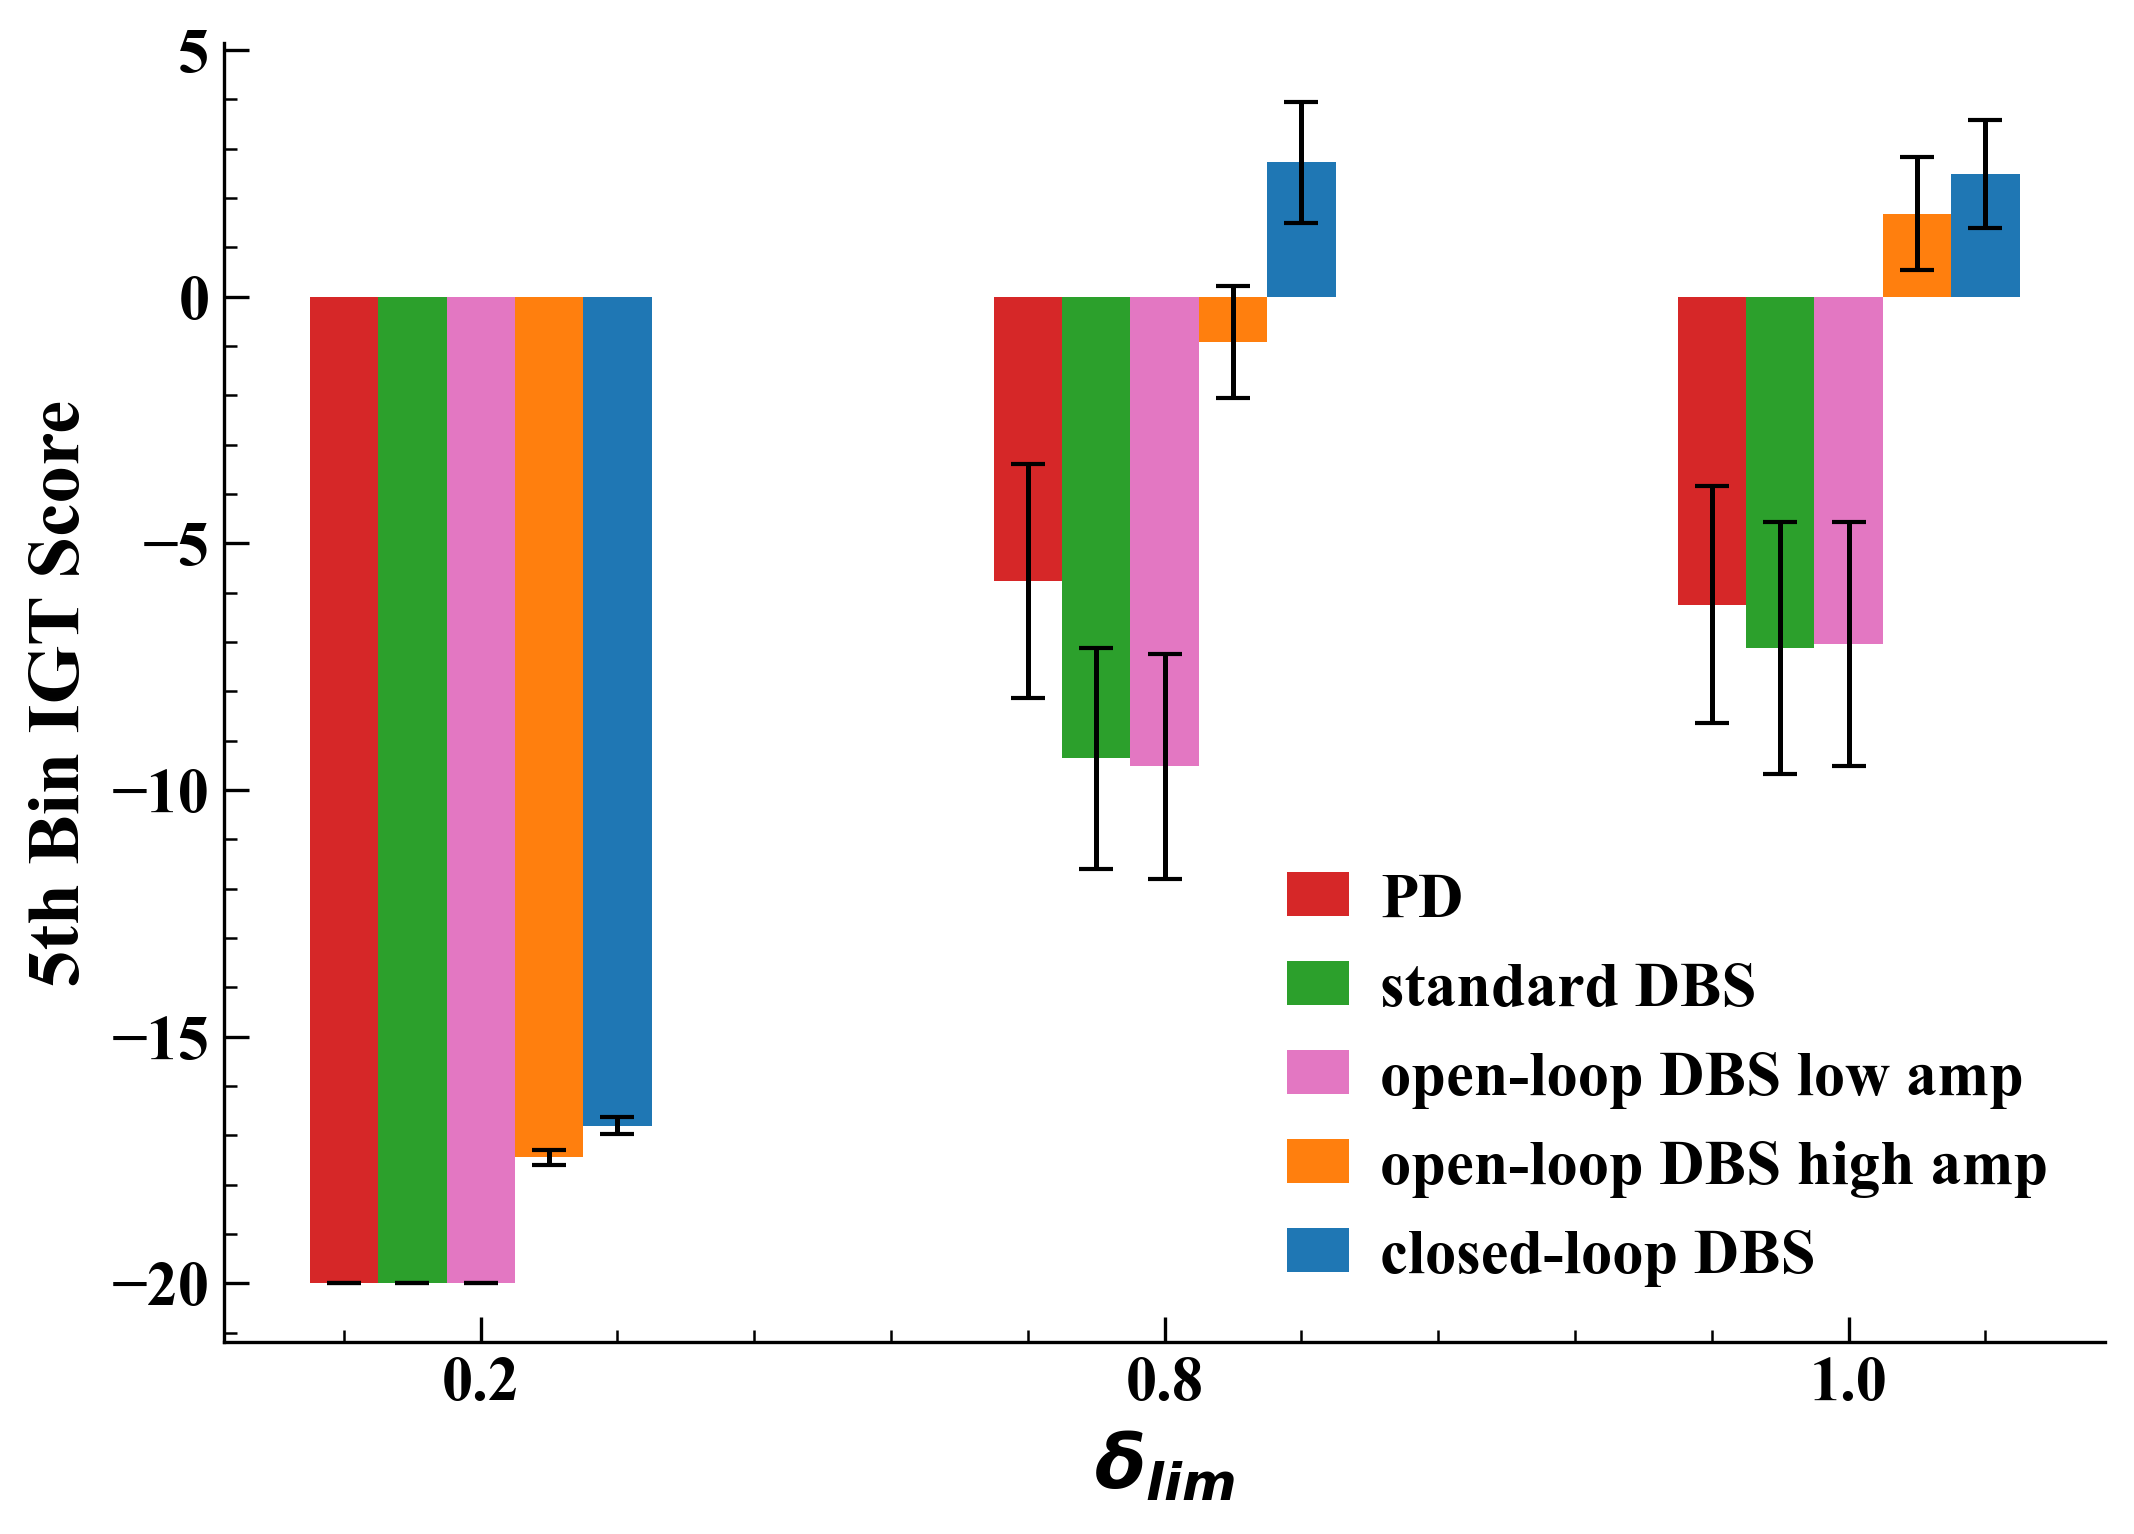

In [20]:
plt.figure(figsize=(7, 5), dpi=300)

bar_width = 0.1
x_values = np.arange(len(del_lim_values_PD))  # x positions for bars
# Plot each dataset with an offset for side-by-side bars and error bars
plt.bar(x_values - bar_width * 2, igt_scores_PD, width=bar_width, label="PD", alpha=alpha, color='#d62728', yerr=igt_errors_PD, capsize=4)
plt.bar(x_values - bar_width, igt_scores_DBS_std, width=bar_width, label="standard DBS", alpha=alpha, color='#2ca02c', yerr=igt_errors_DBS_std, capsize=4)
plt.bar(x_values, igt_scores_DBS_open_low, width=bar_width, label="open-loop DBS low amp", alpha=alpha, color='#e377c2', yerr=igt_errors_DBS_open_low, capsize=4)
plt.bar(x_values + bar_width, igt_scores_DBS_open_high, width=bar_width, label="open-loop DBS high amp", alpha=alpha, color='#ff7f0e', yerr=igt_errors_DBS_open_high, capsize=4)
plt.bar(x_values + bar_width * 2, igt_scores_DBS_closed, width=bar_width, label="closed-loop DBS", alpha=alpha, color='#1f77b4', yerr=igt_errors_DBS_closed, capsize=4)

plt.xlabel(r"$\delta_{lim}$")
plt.ylabel("5th Bin IGT Score")
plt.legend(loc="lower right", frameon=False)#, bbox_to_anchor=(1.5, 0.0))
plt.xticks(x_values, [f"{v:.1f}" for v in del_lim_values_PD], rotation=0)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=6)
plt.tick_params(axis='both', which='minor', length=3)
plt.show()